In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [86]:
# Define VSP color palette
vsp_palette = ["#8E9DC8", "#C56F54", "#72846F", "#6F4E89", "#E0B664"]

# Set as default palette for seaborn and matplotlib
sns.set_palette(vsp_palette)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=vsp_palette)

In [87]:
orden_meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]

In [88]:
data_vsp = pd.read_csv("data/Transferencias_VSP_2024_2025.csv")

In [89]:
data_vsp.columns

Index(['Evento', 'Grupo', 'F. Operativa', 'Transferencia', 'Subgrupo',
       'Valor ( + ) / ( - )', 'Fecha Valor', 'MES', 'AÑO', 'Semana C/P',
       'Mes C/P', 'Año C/P', 'Mes I/G', 'Año I/G', 'Fecha evento', 'Cliente',
       'Tipo Actividad', 'comprobar duplicados', 'Grupo_1_FDC', 'Grupo_2_FDC',
       'Grupo_3_FDC', 'Grupos_Flujo_de_Caja', 'Fecha Grafico'],
      dtype='object')

In [90]:
data_vsp.head()

,Evento,Grupo,F. Operativa,Transferencia,Subgrupo,Valor ( + ) / ( - ),Fecha Valor,MES,AÑO,Semana C/P,...,Año I/G,Fecha evento,Cliente,Tipo Actividad,comprobar duplicados,Grupo_1_FDC,Grupo_2_FDC,Grupo_3_FDC,Grupos_Flujo_de_Caja,Fecha Grafico
0,TIQETS--Espectáculo flamenco-18/10/2023,Transporte,4/09/2023,Añadido manualmente por Marco,Pago,"-130,68€",4/09/2023,sept,2023,36,...,NaN,NaN,NaN,NaN,NaN,Pago,Pago de Actividades,Transporte,Pago Variable - Actividades,9/2023
1,CITITRAVEL-Astellas-iPad Challenge-24/10/2023,Actividad,14/09/2023,Añadido manualmente por Marco,Cobro,"647,97€",14/09/2023,sept,2023,37,...,NaN,NaN,NaN,NaN,NaN,Cobro,Cobro de Actividades,Actividad,Pago Variable - Actividades,NaN
2,NaN,Oficina,2/10/2023,TRANSFERENCIA A JOSEBA G. ANGULO,Pago,"-351,24€",28/12/2023,oct,2023,40,...,NaN,NaN,NaN,NaN,NaN,Pago,Otros,Oficina,Pago Fijo,NaN
3,Faunia-UCI-iPad Challenge-3/10/2023,comida y parking,3/10/2023,Añadido manualmente por Marco,Pago,"-36,30€",3/10/2023,oct,2023,40,...,NaN,NaN,NaN,NaN,NaN,Pago,Pago de Actividades,Comidas y Alojamiento,Pago Variable - Actividades,NaN
4,CIL-María José-Mariachi-8/10/2023,Subcontrata,3/10/2023,TRANSFERENCIA A JUAN LUIS DOMÍNGUEZ,Pago,"-165,00€",31/10/2023,oct,2023,40,...,NaN,NaN,NaN,NaN,NaN,Pago,Pago de Actividades,Subcontrata,Pago Variable - Actividades,NaN


In [91]:
data_vsp.drop(['Transferencia','Fecha Valor','Semana C/P', 
       'Mes C/P', 'Año C/P', 'Mes I/G', 'Año I/G', 'Fecha evento', 'Cliente',
       'Tipo Actividad', 'comprobar duplicados','Fecha Grafico'], axis=1, inplace=True)

In [92]:
data_vsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Evento                1188 non-null   object
 1   Grupo                 1832 non-null   object
 2   F. Operativa          1848 non-null   object
 3   Subgrupo              1848 non-null   object
 4   Valor ( + ) / ( - )   1848 non-null   object
 5   MES                   1848 non-null   object
 6   AÑO                   1848 non-null   int64 
 7   Grupo_1_FDC           1848 non-null   object
 8   Grupo_2_FDC           1848 non-null   object
 9   Grupo_3_FDC           1832 non-null   object
 10  Grupos_Flujo_de_Caja  1848 non-null   object
dtypes: int64(1), object(10)
memory usage: 158.9+ KB


In [93]:
data_vsp.columns = data_vsp.columns.str.lower()

In [94]:
data_vsp.head()

,evento,grupo,f. operativa,subgrupo,valor ( + ) / ( - ),mes,año,grupo_1_fdc,grupo_2_fdc,grupo_3_fdc,grupos_flujo_de_caja
0,TIQETS--Espectáculo flamenco-18/10/2023,Transporte,4/09/2023,Pago,"-130,68€",sept,2023,Pago,Pago de Actividades,Transporte,Pago Variable - Actividades
1,CITITRAVEL-Astellas-iPad Challenge-24/10/2023,Actividad,14/09/2023,Cobro,"647,97€",sept,2023,Cobro,Cobro de Actividades,Actividad,Pago Variable - Actividades
2,NaN,Oficina,2/10/2023,Pago,"-351,24€",oct,2023,Pago,Otros,Oficina,Pago Fijo
3,Faunia-UCI-iPad Challenge-3/10/2023,comida y parking,3/10/2023,Pago,"-36,30€",oct,2023,Pago,Pago de Actividades,Comidas y Alojamiento,Pago Variable - Actividades
4,CIL-María José-Mariachi-8/10/2023,Subcontrata,3/10/2023,Pago,"-165,00€",oct,2023,Pago,Pago de Actividades,Subcontrata,Pago Variable - Actividades


In [95]:
data_vsp = data_vsp.rename(columns={
    'valor ( + ) / ( - )': 'cantidad',
    'f. operativa': 'fecha',
    'grupo_1_fdc': 'tipo_transferencia',
    'grupo_2_fdc': 'grupo_principal_transferencia',
    'grupo_3_fdc': 'específico_transferencia',
    'grupos_flujo_de_caja': 'fijo_variable'
})

In [96]:
meses_map = {
    'ene': 'Enero',
    'feb': 'Febrero',
    'mar': 'Marzo',
    'abr': 'Abril',
    'may': 'Mayo',
    'jun': 'Junio',
    'jul': 'Julio',
    'ago': 'Agosto',
    'sept': 'Septiembre',
    'oct': 'Octubre',
    'nov': 'Noviembre',
    'dic': 'Diciembre'
}

data_vsp['mes'] = data_vsp['mes'].str.lower().map(meses_map)

In [97]:
data_vsp.sample(2)

,evento,grupo,fecha,subgrupo,cantidad,mes,año,tipo_transferencia,grupo_principal_transferencia,específico_transferencia,fijo_variable
1408,NaN,trastero,1/10/2024,Impuesto pagado,"-10,41€",Octubre,2024,Pago,Pago de Impuestos,trastero,Pago Fijo
1649,Visita Guiada + Monólogo (MC) -AMEX--2025-04-04,Transporte,19/02/2025,Impuesto pagado,"-3,25€",Febrero,2025,Pago,Pago de Impuestos,Transporte,Pago Variable - Actividades


In [98]:
data_vsp['cantidad'] = data_vsp['cantidad'].str.replace('€', '', regex=False).str.replace('.', '', regex=False)

In [99]:
data_vsp['cantidad'] = data_vsp['cantidad'].str.replace(',', '.', regex=False)

In [100]:
data_vsp['fecha'] = pd.to_datetime(data_vsp['fecha'], format='%d/%m/%Y')

In [101]:
data_vsp['cantidad'] = data_vsp['cantidad'].astype(float)

In [102]:
# Export the data_vsp DataFrame to a CSV file
# data_vsp.to_csv("data/final/data_vsp_final.csv", index=False)

In [103]:
# Crear tres dataframes separados por año
data_vsp_2023 = data_vsp[data_vsp['año'] == 2023].copy()
data_vsp_2024 = data_vsp[data_vsp['año'] == 2024].copy()
data_vsp_2025 = data_vsp[data_vsp['año'] == 2025].copy()

In [104]:
# Calcular el balance total (suma de 'cantidad') por mes para 2024
# data_vsp_2024 = data_vsp_2024[data_vsp_2024["tipo_transferencia"]=="Pago"].groupby('mes')['cantidad'].sum().reset_index()
# cobros_mes_2024 = data_vsp_2024[data_vsp_2024["tipo_transferencia"]=="Cobro"].groupby('mes')['cantidad'].sum().reset_index()
balance_mes_2024 = data_vsp_2024.groupby('mes', sort=False)['cantidad'].sum().reset_index()

In [105]:

# Always start fresh: convert and filter first
data_vsp['fecha'] = pd.to_datetime(data_vsp['fecha'], format='%d/%m/%Y')
data_filtrada = data_vsp[data_vsp['fecha'] >= pd.Timestamp('2023-09-01')]


balance_mensual = (
    data_filtrada
    .groupby(pd.Grouper(key='fecha', freq='M'))['cantidad']
    .sum()
    .reset_index()
)


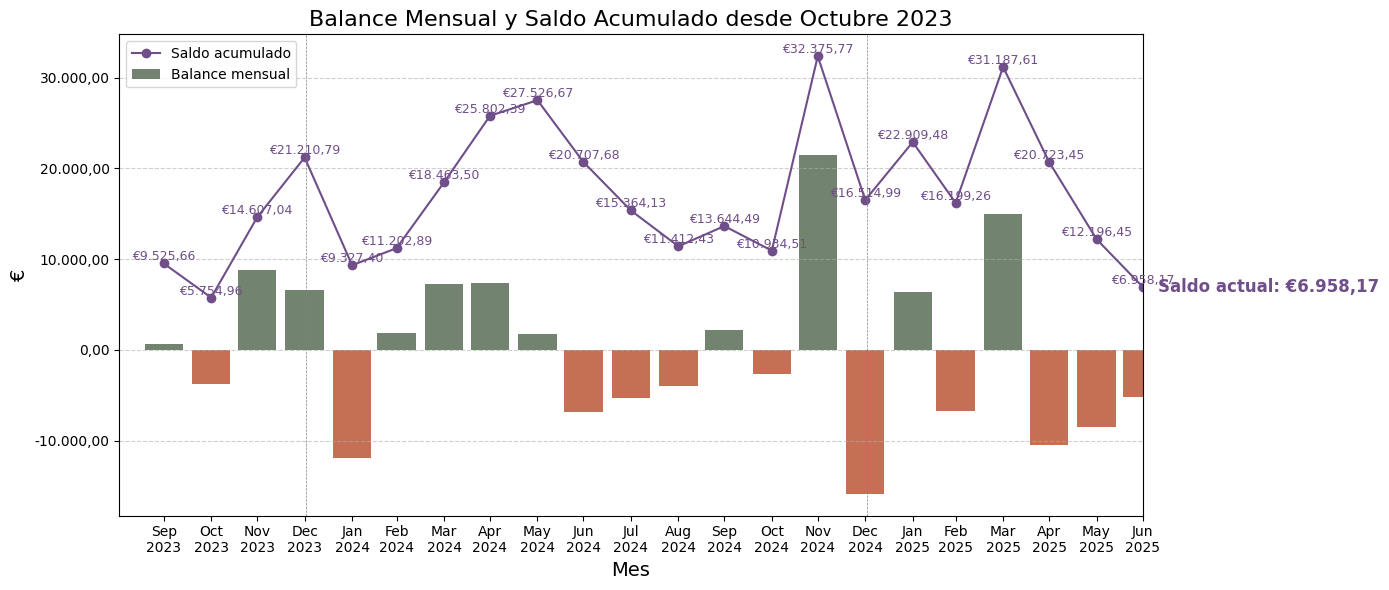

In [118]:

# Step 1: Cumulative liquid account
saldo_inicial = 6701.61 + 2183.76  # banco sept 23 + diferencia por entradas manuales
saldo_total = balance_mensual['cantidad'].cumsum() + saldo_inicial
saldo_actual = saldo_total.iloc[-1]
fecha_actual = balance_mensual['fecha'].iloc[-1]

# Step 2: Plot bar chart
plt.figure(figsize=(14, 6))
bar_width = 25
colors = [vsp_palette[2] if val >= 0 else vsp_palette[1] for val in balance_mensual['cantidad']]
plt.bar(balance_mensual["fecha"], balance_mensual["cantidad"], width=bar_width, color=colors, align='center', label='Balance mensual')

# Step 3: Overlay the cumulative line
plt.plot(balance_mensual["fecha"], saldo_total, color=vsp_palette[3], linewidth=1.5, marker='o', label='Saldo acumulado')

# Text annotation near the end of the line
plt.text(
    fecha_actual + pd.Timedelta(days=10),  # Slight offset on x-axis
    saldo_actual,
    f'Saldo actual: €{saldo_actual:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
    fontsize=12,
    color=vsp_palette[3],
    va='center',
    fontweight='bold'
)

# Labels on each cumulative point
for x, y in zip(balance_mensual["fecha"], saldo_total):
    plt.text(
        x, y,
        f'€{y:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'),
        fontsize=9,
        ha='center',
        va='bottom',
        color=vsp_palette[3],
        fontweight='regular'
    )

# Format y-axis labels
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
)

# Custom x-axis ticks and labels shifted one month back
ticks = balance_mensual["fecha"]
shifted_labels = (ticks - pd.DateOffset(months=0)).dt.strftime('%b\n%Y')
ax = plt.gca()
ax.set_xticks(ticks)
ax.set_xticklabels(shifted_labels)

plt.xlim(pd.Timestamp('2023-09-01'), balance_mensual['fecha'].max())

# Year gridlines
for year in balance_mensual['fecha'].dt.year.unique():
    plt.axvline(pd.Timestamp(f'{year}-01-01'), color='gray', linestyle='--', linewidth=0.5)

# Labels, grid, legend and layout
plt.title('Balance Mensual y Saldo Acumulado desde Octubre 2023', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('€', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

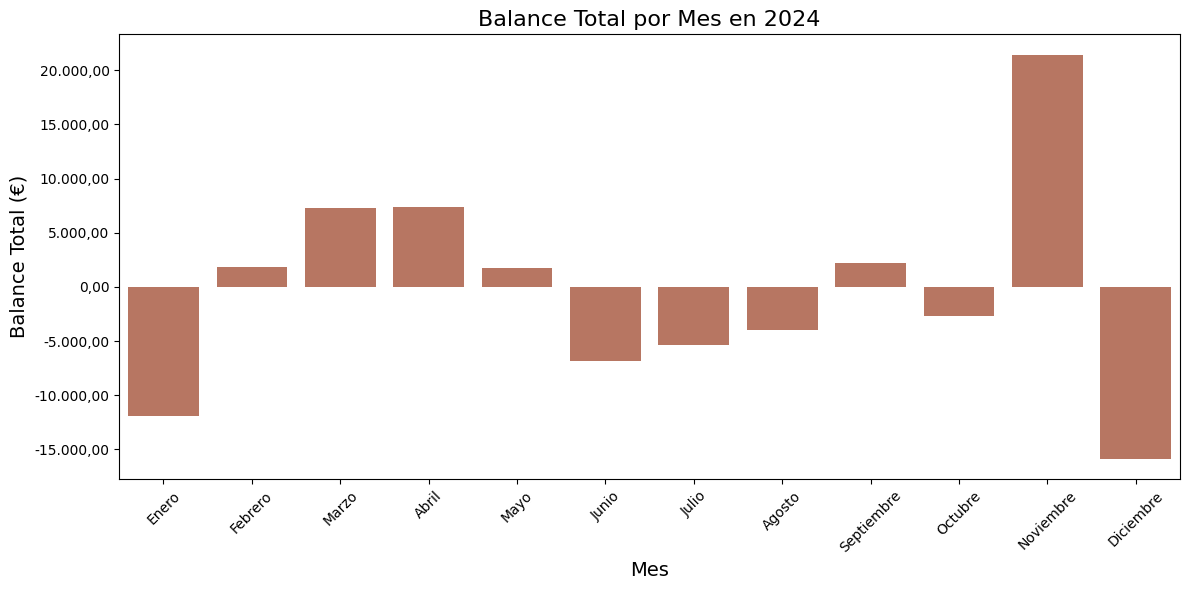

In [119]:
# Graficar el balance mensual
plt.figure(figsize=(12, 6))
sns.barplot(x=balance_mes_2024["mes"], y=balance_mes_2024['cantidad'], color=vsp_palette[1])
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Balance Total (€)', fontsize=14)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
)
plt.title('Balance Total por Mes en 2024', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [120]:
print(data_vsp_2024['mes'].unique())
print(data_vsp_2024['grupo_principal_transferencia'].unique())


['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
['Pago de Actividades' 'Cobro de Actividades' 'Otros' 'Nómina Marco'
 'Pago de Impuestos' 'Cobro de Impuestos']


<Figure size 1400x600 with 0 Axes>

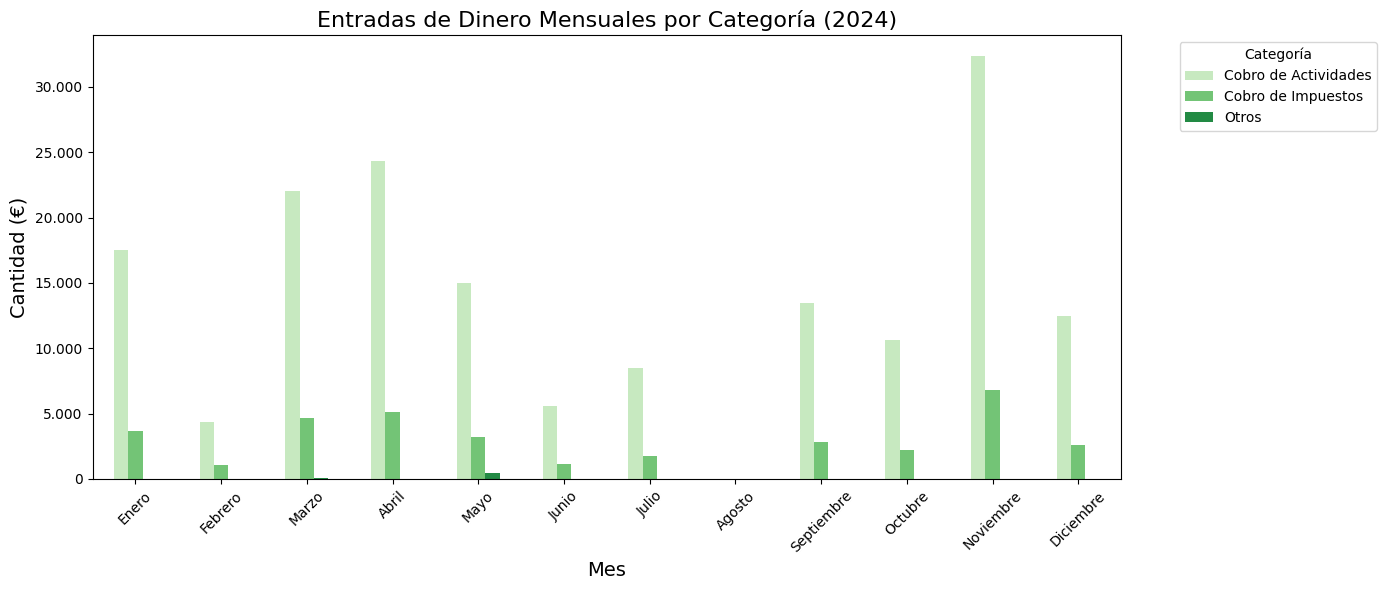

<Figure size 1400x600 with 0 Axes>

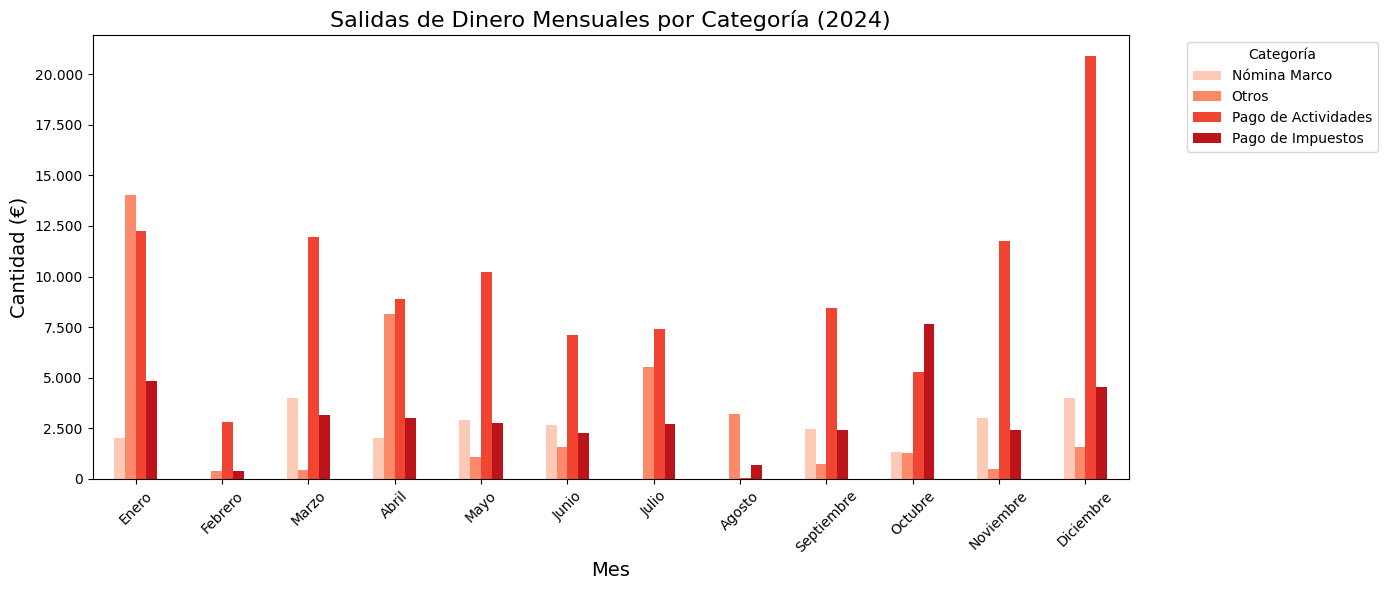

In [121]:
# Separar positivos y negativos
df_positivos = data_vsp_2024[data_vsp_2024['cantidad'] > 0]
df_negativos = data_vsp_2024[data_vsp_2024['cantidad'] < 0]

# Agrupar y pivotear
positivos_mes = df_positivos.groupby(['mes', 'grupo_principal_transferencia'])['cantidad'].sum().unstack(fill_value=0)
negativos_mes = df_negativos.groupby(['mes', 'grupo_principal_transferencia'])['cantidad'].sum().unstack(fill_value=0)

# Asegurar orden de meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
positivos_mes = positivos_mes.reindex(orden_meses)
negativos_mes = negativos_mes.reindex(orden_meses)

# 📊 GRÁFICO DE ENTRADAS (positivos)
plt.figure(figsize=(14, 6))
positivos_mes.plot(kind='bar', figsize=(14, 6), color=sns.color_palette("Greens", len(positivos_mes.columns)))
plt.title('Entradas de Dinero Mensuales por Categoría (2024)', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad (€)', fontsize=14)
plt.xticks(rotation=45)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 📊 GRÁFICO DE SALIDAS (negativos, convertidos a positivos para visual)
negativos_mes_abs = negativos_mes.abs()
plt.figure(figsize=(14, 6))
negativos_mes_abs.plot(kind='bar', figsize=(14, 6), color=sns.color_palette("Reds", len(negativos_mes_abs.columns)))
plt.title('Salidas de Dinero Mensuales por Categoría (2024)', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad (€)', fontsize=14)
plt.xticks(rotation=45)
plt.gca().get_yaxis().set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'{x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

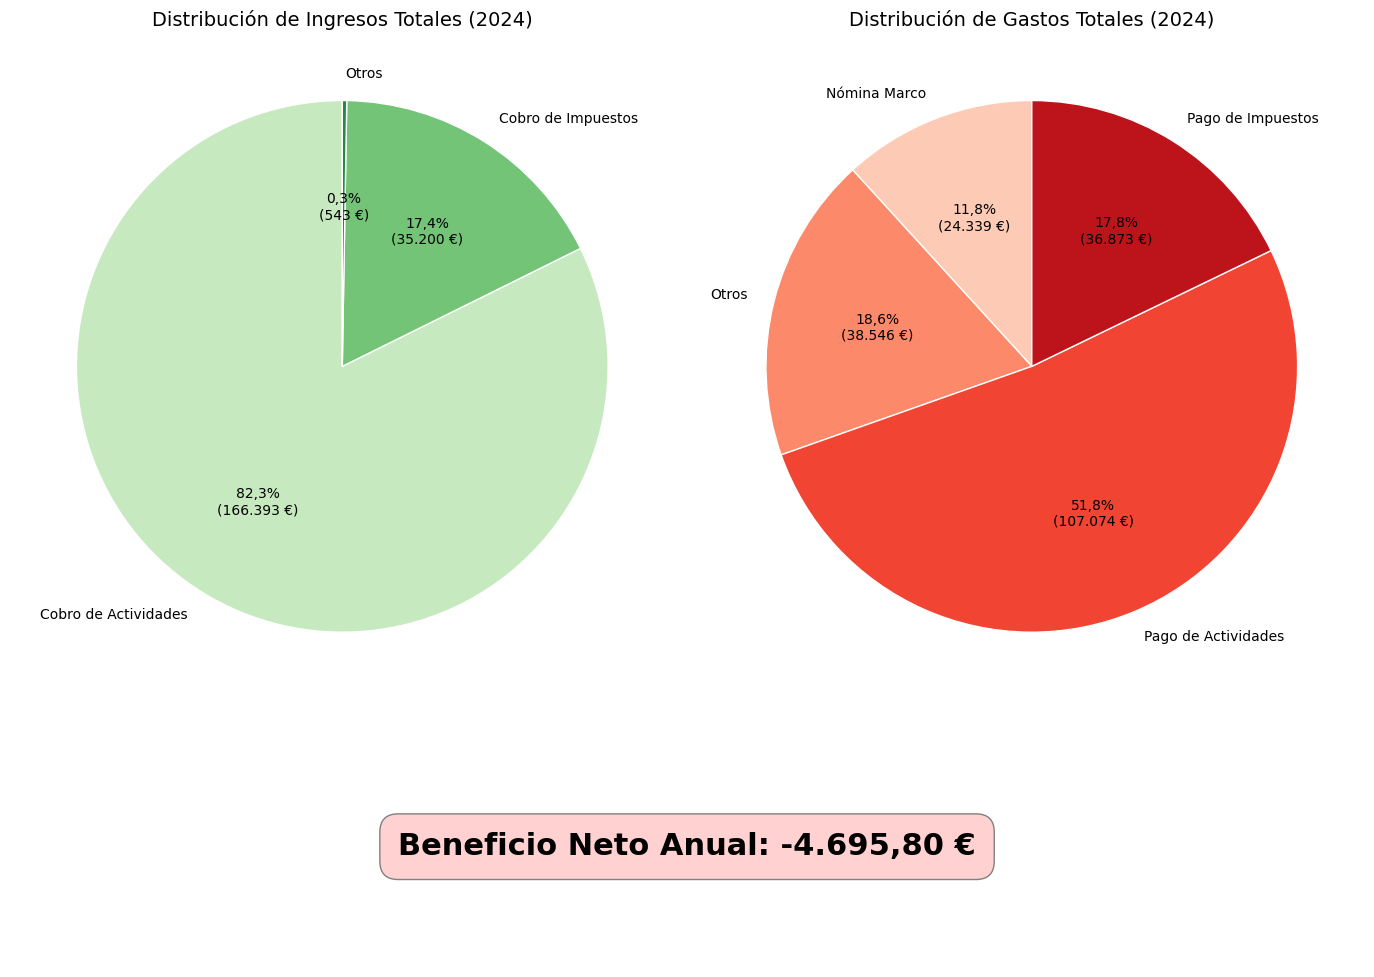

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# ==== Calcular totales ====
gastos_totales = data_vsp_2024[data_vsp_2024['cantidad'] < 0].groupby('grupo_principal_transferencia')['cantidad'].sum().abs()
ingresos_totales = data_vsp_2024[data_vsp_2024['cantidad'] > 0].groupby('grupo_principal_transferencia')['cantidad'].sum()

total_gastos = gastos_totales.sum()
total_ingresos = ingresos_totales.sum()
beneficio_neto = total_ingresos - total_gastos

# ==== Crear figura con gridspec ====
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1])

# 🟩 Pie de Ingresos
ax1 = fig.add_subplot(gs[0, 0])
colores_ingresos = sns.color_palette("Greens", len(ingresos_totales))
ax1.pie(
    ingresos_totales,
    labels=ingresos_totales.index,
    autopct=lambda p: f'{p:.1f}%\n({p/100*sum(ingresos_totales):,.0f} €)'.replace(',', 'X').replace('.', ',').replace('X', '.'),
    colors=colores_ingresos,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
ax1.set_title('Distribución de Ingresos Totales (2024)', fontsize=14)

# 🟥 Pie de Gastos
ax2 = fig.add_subplot(gs[0, 1])
colores_gastos = sns.color_palette("Reds", len(gastos_totales))
ax2.pie(
    gastos_totales,
    labels=gastos_totales.index,
    autopct=lambda p: f'{p:.1f}%\n({p/100*sum(gastos_totales):,.0f} €)'.replace(',', 'X').replace('.', ',').replace('X', '.'),
    colors=colores_gastos,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
ax2.set_title('Distribución de Gastos Totales (2024)', fontsize=14)

# 💰 Beneficio neto centrado
ax3 = fig.add_subplot(gs[1, :])  # Ocupa ambas columnas
ax3.axis('off')  # Ocultar ejes

texto_beneficio = (
    f"Beneficio Neto Anual: {beneficio_neto:,.2f} €"
    .replace(',', 'X').replace('.', ',').replace('X', '.')
)

ax3.text(
    0.5, 0.5, texto_beneficio,
    ha='center', va='center',
    fontsize=22, fontweight='bold',
    bbox=dict(boxstyle='round,pad=0.6',
              facecolor='#d1ffd1' if beneficio_neto >= 0 else '#ffd1d1',
              edgecolor='gray')
)

plt.tight_layout()
plt.show()
